In [13]:
# Kernel PCA 

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [14]:

def kpca(x_train, x_test, n):
    from sklearn.decomposition import KernelPCA
    kpca = KernelPCA(n_components=2, kernel='rbf')
    xTrain= kpca.fit_transform(x_train)
    xTest= kpca.transform(x_test)
    
    return xTrain, xTest

def Split_Scaler(indep,dep):
    x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=0.30,random_state=0)
    scX=StandardScaler()
    x_train=scX.fit_transform(x_train)
    x_test=scX.transform(x_test)
    return x_train,x_test,y_train,y_test, scX

def cm_predition(classifier, x_test):
    y_pred=classifier.predict(x_test)

    #making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)

    # making Classification Report
    from sklearn.metrics import classification_report
    clf_report=classification_report(y_test,y_pred)

    # finding the accuracy score
    from sklearn.metrics import accuracy_score
    accuracy_score=accuracy_score(y_test,y_pred)
    
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred

def logistic(x_train,y_train,x_test):
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression(random_state=0)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 
    
def svm_linear(x_train,y_train,x_test):
    from sklearn.svm import SVC
    classifier=SVC(kernel='linear',random_state=0)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 
    
def svm_nonlinear(x_train,y_train,x_test):
    from sklearn.svm import SVC
    classifier=SVC(kernel='rbf', random_state=0)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 
    
def random(x_train,y_train,x_test):
    from sklearn.ensemble import RandomForestClassifier
    classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test ,y_pred 

def Decision(x_train,y_train,x_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 

def knn(x_train,y_train,x_test):
    from sklearn.neighbors import KNeighborsClassifier
    classifier=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 

def navie(x_train,y_train,x_test):
    from sklearn.naive_bayes import GaussianNB
    classifier=GaussianNB()
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 

# Displaying the values in the tabular frame

def kpca_classification(acc_logistic, acc_svmL, acc_svmNL, acc_knn, acc_rf, acc_des, acc_nav):
    
    table=pd.DataFrame(index=["KPCA"],columns=["Logistic","SVM_linear","SVM_Nonlinear","KNN","Random","Decision","Navie"])
    for number,idex in enumerate(table.index):
         table['Logistic'][idex]= acc_logistic[number]
         table['SVM_linear'][idex]= acc_svmL[number]
         table['SVM_Nonlinear'][idex]= acc_svmNL[number]
         table['KNN'][idex]= acc_knn[number]
         table['Random'][idex]= acc_rf[number]
         table['Decision'][idex]= acc_des[number]
         table['Navie'][idex]= acc_nav[number]
         
    return table




In [15]:
dataset=pd.read_csv("Social_Network_Ads.csv",index_col=None)
df1=dataset  

#Convert categorical variable into dummy/indicator variables.
df1=pd.get_dummies(df1,drop_first=True,dtype=int)
df1

# separation of independent and dependent variables
indep=df1.drop("Purchased",axis=1)
dep=df1["Purchased"]

# separate the train and test data adn apply StandardScalar techniques to standardize feaures...
x_train,x_test,y_train,y_test,scX= Split_Scaler(indep, dep)

print (" before KPCA: ",x_train.shape, x_test.shape)

# Applying KPCA...
xTrain, xTest = kpca(x_train, x_test, 2)



acc_logistic=[]
acc_svmL=[]
acc_svmNL=[]
acc_knn=[]
acc_nav=[]
acc_des=[]
acc_rf=[]

print (" After KPCA: ", xTrain.shape,xTest.shape)


 before KPCA:  (280, 4) (120, 4)
 After KPCA:  (280, 2) (120, 2)


Text(0, 0.5, 'KPCA 2')

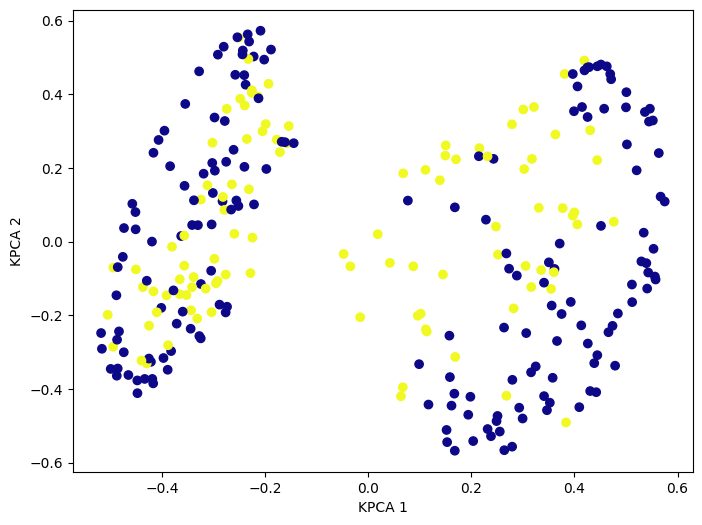

In [16]:
# Great! we have reduced the features from 4 dimention to 2 dimention Let's plot those data points...
plt.figure(figsize=(8,6))
plt.scatter(xTrain[:,0],xTrain[:,1], c=y_train, cmap="plasma")
plt.xlabel("KPCA 1")
plt.ylabel("KPCA 2")

In [17]:
# create, train and prdict the models using diff algorithms...
classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = logistic(xTrain,y_train,xTest)
acc_logistic.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = svm_linear(xTrain,y_train,xTest)
acc_svmL.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = svm_nonlinear(xTrain,y_train,xTest)
acc_svmNL.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = knn(xTrain,y_train,xTest)
acc_knn.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred= navie(xTrain,y_train,xTest)
acc_nav.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = Decision(xTrain,y_train,xTest)
acc_des.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = random(xTrain,y_train,xTest)
acc_rf.append(accuracy_score)

result= kpca_classification(acc_logistic,acc_svmL,acc_svmNL,acc_knn,acc_rf,acc_des,acc_nav)



/opt/anaconda3/envs/venvaiml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/venvaiml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/venvaiml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [18]:
result # p=2

,Logistic,SVM_linear,SVM_Nonlinear,KNN,Random,Decision,Navie
KPCA,0.658333,0.658333,0.758333,0.733333,0.716667,0.675,0.683333


In [19]:
#### Accuracy score for the svm_nonlinear classfication model is high... so will save the model

In [20]:
svm_linear_classifier ,cm,clf_report,accuracy_score,x_test,y_test,y_pred = svm_nonlinear(xTrain,y_train,xTest)


In [21]:
#### Accuracy score for the svm_nonlinear classfication model is high... so will save the model 


In [22]:
# Save the svm_nonlinear classfication model 

pickle.dump(svm_linear_classifier,open("Finalized_svm_nonlinear_Model",'wb'))

In [23]:
pickle.dump(scX,open("SCX.pk",'wb'))

In [24]:
# Create the list of column names using a simple for loop
column_names = []
for i in range(1, xTrain.shape[1] + 1 ):
    column_names.append(f'KPC{i}')

# Create the DataFrame with the generated column names
kpca_features = pd.DataFrame(xTrain, columns=column_names)


#kpca_features= pd.DataFrame(xTrain, columns = [f'PC{i}' for i in range(1, xTrain.shape[1] +1) ])
                                                  
# Show the transformed features
print(kpca_features.head())

       KPC1      KPC2
0  0.098756 -0.332953
1  0.067864  0.185165
2 -0.278040  0.327315
3  0.063600 -0.420095
4 -0.421248 -0.326553
